In [1]:
import pandas as pd
import numpy as np

# read emoticon dataset
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("datasets/test/test_emoticon.csv")['input_emoticon'].tolist()
val_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
val_emoticon_X = val_emoticon_df['input_emoticon'].tolist()
val_emoticon_Y = val_emoticon_df['label'].tolist()
# read text sequence dataset
train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

val_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
val_seq_X = val_seq_df['input_str'].tolist()
val_seq_Y = val_seq_df['label'].tolist()

test_seq_X = pd.read_csv("datasets/test/test_text_seq.csv")['input_str'].tolist()



# read feature dataset
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

test_feat_X = np.load("datasets/test/test_feature.npz", allow_pickle=True)['features']


print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")
print(f"train_seq_X: {len(train_seq_X)} train_seq_Y: {len(train_seq_Y)}")
print(f"train_feat_X: {train_feat_X.shape} train_feat_Y: {train_feat_Y.shape}")


print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")
print(f"test_seq_X: {type(test_seq_X[0])} ")
print(f"test_feat_X: {test_feat_X.shape}")
print(f"val_seq_X: {len(val_seq_X)}")
print(f"val_seq_Y: {len(val_seq_Y)}")
print(train_seq_X[0])
print(train_seq_X[0:10])

Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080
train_seq_X: 7080 train_seq_Y: 7080
train_feat_X: (7080, 13, 768) train_feat_Y: (7080,)

Test dataset size: 
test_emoticon_X: 2232
test_seq_X: <class 'str'> 
test_feat_X: (2232, 13, 768)
val_seq_X: 489
val_seq_Y: 489
00001543646427181596614280026242231322841596262614
['00001543646427181596614280026242231322841596262614', '00046415963695154364222626141104715962624761614284', '00015436262159659996144224641358061426240511596284', '00001543642246412386142621596895615962843510614262', '00046418994221543620690159661426247612621596614284', '00015966143365815436291942226246428461415962780262', '00006141596262422464805552371543661433651596284262', '00005999422159646485262621543661415962621495284614', '00046415436306991596422570561426261415962622414284', '00026215962639046442261415436209147902622841596614']


In [132]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.1/124.9 MB 514.3 kB/s eta 0:04:03
   ---------------------------------------- 0.1/124.9 MB 514.3 kB/s eta 0:04:03
   ---------------------------------------- 0.3/124.9 MB 785.2 kB/s eta 0:02:39
   ---------------------------------------- 0.3/124.9 MB 785.2 kB/s eta 0:02:39
   ---------------------------------------- 0.4/124.9 MB 933.2 kB/s eta 0:02:14
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 0:01:39
   ---

dataset size =  100 %
0:	learn: 0.6912061	total: 6.66ms	remaining: 6.65s
100:	learn: 0.6345343	total: 552ms	remaining: 4.92s
200:	learn: 0.5896257	total: 1.07s	remaining: 4.27s
300:	learn: 0.5594594	total: 1.55s	remaining: 3.6s
400:	learn: 0.5337331	total: 2.04s	remaining: 3.05s
500:	learn: 0.5117684	total: 2.54s	remaining: 2.53s
600:	learn: 0.4911360	total: 3.04s	remaining: 2.02s
700:	learn: 0.4737834	total: 3.52s	remaining: 1.5s
800:	learn: 0.4575584	total: 4s	remaining: 995ms
900:	learn: 0.4418286	total: 4.51s	remaining: 495ms
999:	learn: 0.4274045	total: 4.99s	remaining: 0us
CatBoost Test Accuracy: 68.92%
[(1, 0.689161554192229)]


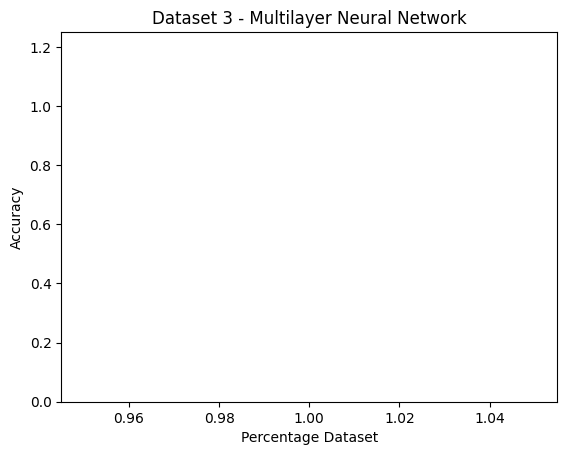

In [93]:

def XGBoostModel(percent):
    import numpy as np
    import xgboost as xgb
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    from catboost import CatBoostClassifier
    from xgboost import XGBClassifier
    from sklearn.model_selection import RandomizedSearchCV

    # Assuming that input values are digits (0-9)
    dataset = int(percent * 7080)
    
    # Prepare your data here, assuming `train_seq_X` and `train_seq_Y` are defined elsewhere
    X_train = np.array([list(map(int, train_seq_X[i])) for i in range(dataset)])
    y_train = np.array(train_seq_Y[:dataset])
    X_test = np.array([list(map(int, val_seq_X[i])) for i in range(489)])
    y_test = np.array(val_seq_Y)
    
    catboost_model = CatBoostClassifier(
        iterations=1000,  # Number of boosting iterations
        learning_rate=0.1,  # Learning rate for training
        depth=3,  # Depth of the trees
        loss_function='Logloss',  # Loss function for binary classification
        verbose=100  # Print training updates every 100 iterations
    )
    
    # Train the CatBoost model
    catboost_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = catboost_model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"CatBoost Test Accuracy: {accuracy * 100:.2f}%")
    return accuracy
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,XGBoostModel(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

# Example usage (assuming you have train_seq_X, train_seq_Y, val_seq_X, and val_seq_Y):
# XGBoostModel(1.0)   # This would train the model on 100% of the data


In [29]:
pip install catboost



   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 544.7 kB/s eta 0:03:07
   ---------------------------------------- 0.1/101.7 MB 544.7 kB/s eta 0:03:07
   ---------------------------------------- 0.1/101.7 MB 403.5 kB/s eta 0:04:12
   ---------------------------------------- 0.1/101.7 MB 423.5 kB/s eta 0:04:00
   ---------------------------------------- 0.2/101.7 MB 490.7 kB/s eta 0:03:27
   ---------------------------------------- 0.2/101.7 MB 597.3 kB/s eta 0:02:50
   ---------------------------------------- 0.3/101.7 MB 654.7 kB/s eta 0:02:35
   ---------------------------------------- 0.3/101.7 MB 723.4 kB/s eta 0:02:21
   -

## attention layer

In [108]:
def AL(percent):
   
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Input, Attention, Flatten

    # Assuming that input values are digits (0-9)
    dataset = int(percent * 7080)
    
    # Prepare your data here, assuming `train_seq_X` and `train_seq_Y` are defined elsewhere
    X_train = np.array([list(map(int, train_seq_X[i])) for i in range(dataset)])
    y_train = np.array(train_seq_Y[:dataset])
    X_test = np.array([list(map(int, val_seq_X[i])) for i in range(489)])
    y_test = np.array(val_seq_Y)

    # Define the model using the Keras Functional API
    input_seq = Input(shape=(50,))  # Input shape is (50,)
    
    # 1. Add an Embedding layer (13 possible emojis, mapped to a dense vector of size 32)
    embedding_dim = 32
    x = Embedding(input_dim=13, output_dim=embedding_dim, input_length=50)(input_seq)
    
    # 2. LSTM layer with 32 units, return sequences for attention
    x = LSTM(32, return_sequences=True)(x)  # Set return_sequences=True to use attention
    
    # 3. Attention mechanism
    attention_output = Attention()([x, x])  # Self-attention, query and value are the same
    
    # 4. Dropout layer to prevent overfitting
    x = Dropout(0.5)(attention_output)
    
    # 5. Batch Normalization layer for stable learning
    x = BatchNormalization()(x)
    
    # 6. Flatten the output before the final dense layer
    x = Flatten()(x)
    
    # 7. Dense layer with 15 units (ReLU activation)
    x = Dense(15, activation='relu')(x)
    
    # 8. Another Dropout layer to further regularize
    x = Dropout(0.5)(x)
    
    # 9. Final output layer for binary classification (1 unit, sigmoid activation)
    output = Dense(1, activation='sigmoid')(x)

    # Compile the model
    model = Model(inputs=input_seq, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    # Train the model (verbose=0 to suppress training output)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"GRU with Attention Test Accuracy: {accuracy * 100:.2f}%")

    # Model Summary
    if percent==1:
        model.summary()
    return accuracy
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,AL(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

dataset size =  100 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4956 - loss: 0.7190 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5028 - loss: 0.6938 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5005 - loss: 0.6937 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5055 - loss: 0.6935 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4987 - loss: 0.6937 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4899 - loss: 0.6932 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5081 - loss: 0.6931 - 

KeyboardInterrupt: 

# LSTM

In [99]:
def LSTM(percent):
    import numpy as np
    from sklearn.metrics import accuracy_score
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Attention
    from tensorflow.keras import layers
        
    # Generate a random dataset
    # X_train: (7080, 50) for training, X_test: (489, 50) for testing
    # In real applications, replace this with your actual dataset
    
    # Assuming that input values are digits (0-9)
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    # Reshape input for LSTM - LSTM expects (samples, timesteps, features)
    # Each sequence has 50 timesteps and 1 feature per timestep
    #X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    #X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Model definition
    model = Sequential()
    
    # 1. Add an Embedding layer (214 possible emojis, mapped to a dense vector of size 10)
    embedding_dim = 32
    model.add(Embedding(input_dim=13, output_dim=embedding_dim, input_length=50))
    
    # 2. LSTM layer with 30 units
    model.add(LSTM(32,return_sequences=False))
    
    # 3. Dropout layer to prevent overfitting (0.3 dropout)
    model.add(Dropout(0.5))
    
    # 4. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 5. Dense layer with 15 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 6. Another Dropout layer to further regularize
    model.add(Dropout(0.5))
    
    # 7. Dense layer with 8 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 8. Final output layer for binary classification (1 unit, sigmoid activation)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    # Train the model (verbose=0 to suppress training output)
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")

    # Model Summary
    if percent==1:
        model.summary()
    return accuracy


In [ ]:
acc=[]
i=0.2
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,LSTM(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

dataset size =  20.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5114 - loss: 0.7182 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5125 - loss: 0.7077 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5013 - loss: 0.7001 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5171 - loss: 0.6983 - val_accuracy: 0.5153 - val_loss: 0.6929
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5243 - loss: 0.6932 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5416 - loss: 0.6944 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4790 - loss: 0.6950 - val_accuracy: 0.5153 - val_loss: 0.6930
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5249 - loss: 0.6899 - val_accuracy: 0

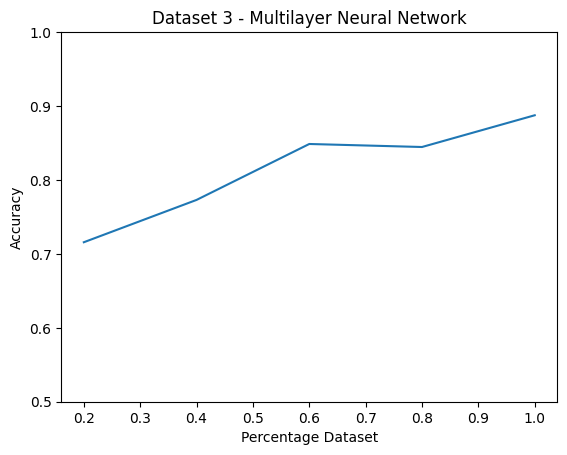

In [25]:
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0.5, 1)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

In [15]:
def LSTM3(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, Attention, LayerNormalization, Conv1D, MaxPooling1D
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import ReduceLROnPlateau
    
    # Generate a random dataset
    # X_train: (7080, 50) for training, X_test: (489, 50) for testing
    # In real applications, replace this with your actual dataset
    
    # Assuming that input values are digits (0-9)
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    # Reshape input for LSTM - LSTM expects (samples, timesteps, features)
    # Each sequence has 50 timesteps and 1 feature per timestep
    #X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    #X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Model definition
    model = Sequential()
        
        # 1. Add an Embedding layer with 768-dimensional embeddings
    embedding_dim = 768
    model.add(Embedding(input_dim=214, output_dim=embedding_dim, input_length=50))
    
    # 2. Reshape the output of the Embedding layer to 3D for Conv1D
    model.add(tf.keras.layers.Reshape((50, embedding_dim)))
    
    # 3. Convolutional layer with reduced filters
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Reduced from 64 to 32
    model.add(MaxPooling1D(pool_size=2))
    
    # 4. LSTM layer with reduced units
    model.add(LSTM(16))  # Reduced from 64 to 16
    
    # 5. Dropout layer with 0.4 dropout rate
    model.add(Dropout(0.4))
    
    # 6. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 7. Dense layer with reduced units
    model.add(Dense(10, activation='relu'))  # Reduced from 30 to 10
    
    # 8. Another Dropout layer with 0.4 dropout rate
    model.add(Dropout(0.4))
    
    # 9. Final output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")

    # Model Summary
    if percent==1:
        model.summary()
    return accuracy


In [33]:
def LSTM4(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, Attention, LayerNormalization
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import ReduceLROnPlateau
    
    # Generate a random dataset
    # X_train: (7080, 50) for training, X_test: (489, 50) for testing
    # In real applications, replace this with your actual dataset
    
    # Assuming that input values are digits (0-9)
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    # Reshape input for LSTM - LSTM expects (samples, timesteps, features)
    # Each sequence has 50 timesteps and 1 feature per timestep
    #X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    #X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Model definition
    model = Sequential()
    
    # 1. Add an Embedding layer (214 possible emojis, mapped to a dense vector of size 10)
    embedding_dim = 32
    model.add(Embedding(input_dim=50, output_dim=embedding_dim, input_length=50))
    
    # 2. LSTM layer with 30 units
    model.add(LSTM(30))
    
    # 3. Dropout layer to prevent overfitting (0.3 dropout)
    model.add(Dropout(0.5))
    
    # 4. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 5. Dense layer with 15 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 6. Another Dropout layer to further regularize
    model.add(Dropout(0.5))
    
    # 7. Dense layer with 8 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 8. Final output layer for binary classification (1 unit, sigmoid activation)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    # Train the model (verbose=0 to suppress training output)
    model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")

    # Model Summary
    if percent==1:
        model.summary()
    return accuracy


dataset size =  100 %
Epoch 1/70


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5150 - loss: 0.7045 - val_accuracy: 0.5317 - val_loss: 0.6903
Epoch 2/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5647 - loss: 0.6830 - val_accuracy: 0.5706 - val_loss: 0.6694
Epoch 3/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5827 - loss: 0.6703 - val_accuracy: 0.6176 - val_loss: 0.6574
Epoch 4/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5999 - loss: 0.6625 - val_accuracy: 0.5603 - val_loss: 0.6766
Epoch 5/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5924 - loss: 0.6621 - val_accuracy: 0.6605 - val_loss: 0.6313
Epoch 6/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6386 - loss: 0.6389 - val_accuracy: 0.6503 - val_loss: 0.6678
Epoch 7/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6346 - loss: 0.6422 - val_accuracy: 0.6892 - val_loss: 0.6232
Epoch 8/70
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6644 - loss: 0.6261 - val_accuracy: 0.67

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 50, 32)              │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 30)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,885 (116.74 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 60 (240.00 B)

 Optimizer params: 19,884 (77.68 KB)

[(1, 0.8813905715942383)]


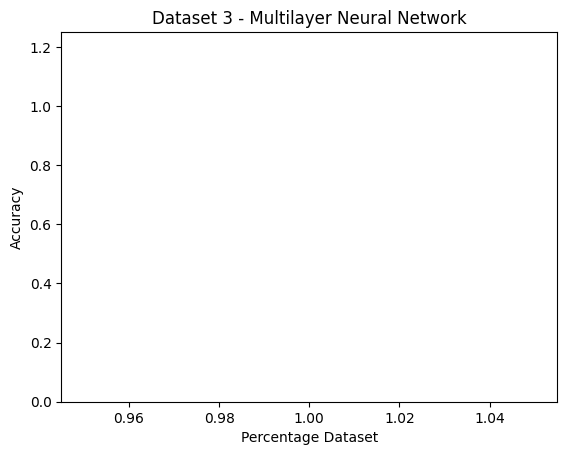

In [35]:
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,LSTM4(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

In [65]:
def GRU4(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, BatchNormalization, Attention, LayerNormalization
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import ReduceLROnPlateau
    
    # Generate a random dataset
    dataset=int(percent*7080)

    X_train = np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    y_train = np.array(train_seq_Y[:dataset])
    X_test = np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test = np.array(val_seq_Y)
    
    # Model definition
    model = Sequential()
    
    # 1. Add an Embedding layer (214 possible emojis, mapped to a dense vector of size 32)
    embedding_dim = 32
    model.add(Embedding(input_dim=50, output_dim=embedding_dim, input_length=50))
    
    # 2. GRU layer with 30 units
    model.add(GRU(30))
    
    # 3. Dropout layer to prevent overfitting (0.5 dropout)
    model.add(Dropout(0.3))
    
    # 4. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 5. Dense layer with 15 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 6. Another Dropout layer to further regularize
    model.add(Dropout(0.3))
    
    # 7. Dense layer with 15 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 8. Final output layer for binary classification (1 unit, sigmoid activation)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    # Train the model (verbose=0 to suppress training output)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"GRU Test Accuracy: {accuracy * 100:.2f}%")

    # Model Summary
    if percent == 1:
        model.summary()
    
    return accuracy


dataset size =  100 %
Epoch 1/10


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.4990 - loss: 0.7044 - val_accuracy: 0.4888 - val_loss: 0.6943
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5247 - loss: 0.6917 - val_accuracy: 0.5726 - val_loss: 0.6786
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5809 - loss: 0.6717 - val_accuracy: 0.6421 - val_loss: 0.6480
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6230 - loss: 0.6559 - val_accuracy: 0.6360 - val_loss: 0.6591
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6271 - loss: 0.6409 - val_accuracy: 0.6421 - val_loss: 0.6280
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6492 - loss: 0.6281 - val_accuracy: 0.6789 - val_loss: 0.6208
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6659 - loss: 0.6107 - val_accuracy: 0.6830 - val_loss: 0.5859
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6915 - loss: 0.5816 - val_accuracy: 0.70

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 50, 32)              │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 30)                  │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,485 (95.65 KB)

 Trainable params: 8,141 (31.80 KB)

 Non-trainable params: 60 (240.00 B)

 Optimizer params: 16,284 (63.61 KB)

[(1, 0.7239263653755188)]


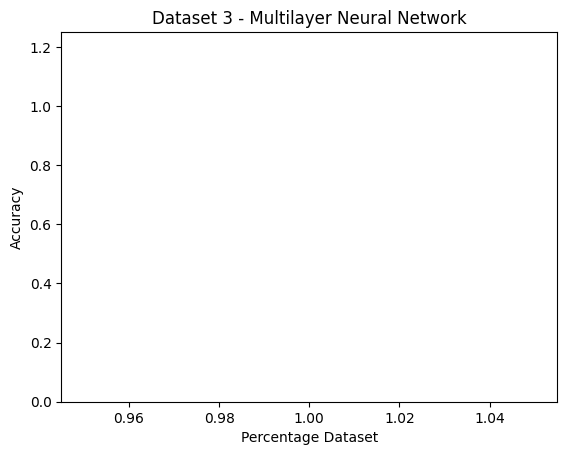

In [67]:
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,GRU4(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

In [151]:
def LSTM2(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    # Model definition
    model = Sequential()
    
    # 1. Add an Embedding layer (214 possible emojis, mapped to a dense vector of size 10)
    embedding_dim = 10
    model.add(Embedding(input_dim=214, output_dim=embedding_dim, input_length=50))
    
    # 2. Bidirectional LSTM layer with 64 units
    model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Use return_sequences=True for multiple LSTM layers
    
    # 3. Additional LSTM layer with 32 units
    model.add(Bidirectional(LSTM(32)))  # Another LSTM layer for deeper learning
    
    # 4. Dropout layer to prevent overfitting (0.3 dropout)
    model.add(Dropout(0.3))
    
    # 5. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 6. Dense layer with 30 units (ReLU activation)
    model.add(Dense(30, activation='relu'))
    
    # 7. Another Dropout layer to further regularize
    model.add(Dropout(0.3))
    
    # 8. Dense layer with 15 units (ReLU activation)
    model.add(Dense(15, activation='relu'))
    
    # 9. Final output layer for binary classification (1 unit, sigmoid activation)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    # Implement early stopping and learning rate reduction on plateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    
    # Train the model (verbose=1 to see training output)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
              verbose=1, callbacks=[early_stopping, lr_scheduler])
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")
    
    # Model Summary
    model.summary()

    return accuracy


dataset size =  100 %
Epoch 1/30


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5060 - loss: 0.7183 - val_accuracy: 0.6115 - val_loss: 0.6908
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5603 - loss: 0.6789 - val_accuracy: 0.6339 - val_loss: 0.6813
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5800 - loss: 0.6710 - val_accuracy: 0.6728 - val_loss: 0.6550
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5922 - loss: 0.6621 - val_accuracy: 0.6789 - val_loss: 0.6302
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6102 - loss: 0.6556 - val_accuracy: 0.6912 - val_loss: 0.6243
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6225 - loss: 0.6450 - val_accuracy: 0.6626 - val_loss: 0.6209
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6360 - loss: 0.6386 - val_accuracy: 0.7096 - val_loss: 0.5989
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6470 - loss: 0.6301 - val_accuracy: 0.69

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 768)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 50, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 48, 32)              │          73,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,417 (2.76 MB)

 Trainable params: 241,461 (943.21 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 482,924 (1.84 MB)

[(1, 0.8179959058761597)]


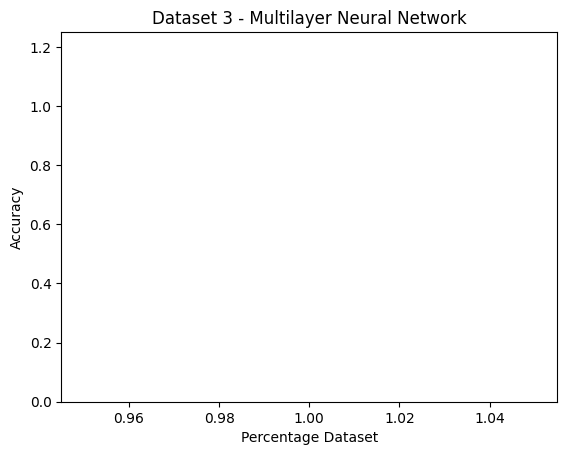

In [17]:
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,LSTM3(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

In [203]:
def CNVLSTM(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Conv1D, MaxPooling1D
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    # Reshape for Conv1D (samples, time steps, features)
    # Reshape for Conv1D (samples, time steps, features)
    X_train = np.expand_dims(X_train, axis=-1)  # Shape becomes (7080, 50, 1)
    X_test = np.expand_dims(X_test, axis=-1)    # Shape becomes (489, 50, 1)
    
    # Model definition
    model = Sequential()
    
    # 1. Add an Embedding layer with reduced dimensions
    embedding_dim = 10  # Reduced from 10 to 5
    model.add(Embedding(input_dim=214, output_dim=embedding_dim, input_length=50))
    
    # 2. Reshape the output of the Embedding layer to 3D for Conv1D
    model.add(tf.keras.layers.Reshape((50, embedding_dim)))
    
    # 3. Convolutional layer with reduced filters
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Reduced from 64 to 32
    model.add(MaxPooling1D(pool_size=2))
    
    # 4. LSTM layer with reduced units
    model.add(LSTM(16))  # Reduced from 64 to 16
    
    # 5. Dropout layer to prevent overfitting
    model.add(Dropout(0.3))
    
    # 6. Batch Normalization layer for stable learning
    model.add(BatchNormalization())
    
    # 7. Dense layer with reduced units
    model.add(Dense(30, activation='relu'))  # Reduced from 30 to 10
    
    # 8. Final output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")
    
    # Model Summary
    model.summary()

dataset size =  100 %
Epoch 1/100


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5050 - loss: 0.6971 - val_accuracy: 0.5501 - val_loss: 0.6927
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5335 - loss: 0.6911 - val_accuracy: 0.5808 - val_loss: 0.6911
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5537 - loss: 0.6878 - val_accuracy: 0.5562 - val_loss: 0.6833
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5774 - loss: 0.6822 - val_accuracy: 0.5992 - val_loss: 0.6748
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5817 - loss: 0.6778 - val_accuracy: 0.6380 - val_loss: 0.6658
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5991 - loss: 0.6692 - val_accuracy: 0.5706 - val_loss: 0.6673
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6129 - loss: 0.6585 - val_accuracy: 0.5910 - val_loss: 0.6623
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6345 - loss: 0.6429 - val_accuracy: 0.638

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)             │ (None, 50, 1, 10)           │           2,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 50, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 48, 32)              │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,637 (139.21 KB)

 Trainable params: 11,857 (46.32 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 23,716 (92.64 KB)

[(1, None)]


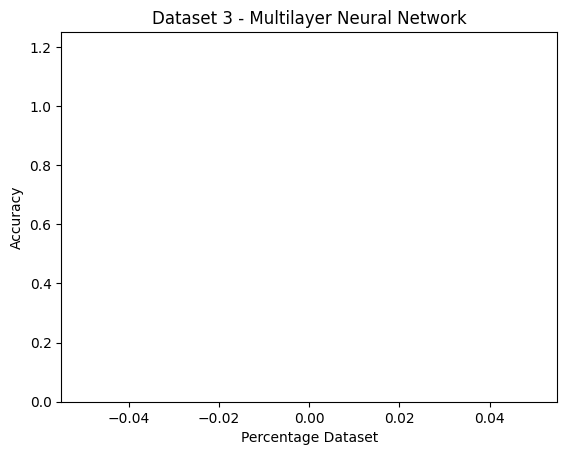

In [205]:
acc=[]
i=1
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,CNVLSTM(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

In [3]:
emozi_set = set()
for datapoint in train_emoticon_X:
    for emozi in datapoint:
        emozi_set.add(emozi)
emozi_list = list(emozi_set)
# s='😣'
# print(s)
# print((emozi_list))arr = []
count = dict()
for emozi in emozi_list:
    for datapoint in train_emoticon_X:
        for x in datapoint:
            if(x == emozi):
                count[emozi] = count[emozi]+1 if emozi in count else 1

count=sorted(count.items(), key=lambda kv:(kv[1],kv[0]), reverse=True)
known= [list(datapoint) for datapoint in count[:7]]
print(known)
#print(emoticon_X[0:10])
#id=np.where(known[][0]==emoticon_X[0])[0]
#print(id)'😣'
a = [known[i][0] for i in range(7)]
print(a)

[['🙯', 14160], ['😣', 14160], ['😑', 14160], ['🛐', 7080], ['🚼', 7080], ['🙼', 7080], ['😛', 7080]]
['🙯', '😣', '😑', '🛐', '🚼', '🙼', '😛']


In [184]:
print( '🛐' not in a)

False


In [185]:
#print(train_emoticon_X[0:8 ])
#print(train_emoticon_X[0][1])

ds=[]
for i in range(7080):
    tmp=[]
    for j in range(13):
        if train_emoticon_X[i][j] not in a :
            #print( (j+1), end =" ")
            tmp.append(j+1)
    #print()
    ds.append(tmp)
ds=np.array(ds)
val_ds=[]
for i in range(489):
    tmp=[]
    for j in range(13):
        if val_emoticon_X[i][j] not in a :
            #print( (j+1), end =" ")
            tmp.append(j+1)
    #print()
    val_ds.append(tmp)
val_ds=np.array(val_ds)
print(val_emoticon_X[0:10])
#print(val_ds)

['🚼😛😔😑😣🚚🙯🛐🙼😑😣🙯🚍', '🛐😣🙗😛🙸🙯😑🚼😑🙯😣🙼😉', '🚼🛐🚩😛🙯🚄😣😑😸🙯😑🙼😣', '😛😡😑🙻😣🙯🚼🛐😣😒🙯🙼😑', '🙨😑😳😛😣🛐🚼🙯😚😣🙼😑🙯', '🚼🙯🛐😛🚚😣🚺😑😑🙼🙬😣🙯', '😣😆🙯🛐😑🚼😙😛🙅😣🙯🙼😑', '😣😑😛🚼😃\U0001f6db🙯🛐🙼🙯😣😑🙄', '🚍🚼😑🛊😛😣🙯🛐😑🙼😇🙯😣', '😣😊🚈🚼😛🙯😑🛐😑🙼🙯😴😣']


# MNN on Position value

In [198]:
def MNN(percent):
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras import layers, models
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    # Define the neural network
    model = models.Sequential()
    
    # Input layer
    model.add(layers.InputLayer(input_shape=(3,)))
    
    # Hidden layer 1 with 100 nodes
    model.add(layers.Dense(100, activation='relu'))
    
    # Hidden layer 2 with 40 nodes
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(40, activation='relu'))
    
    
    # Output layer with 1 node (for binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train=ds[0:dataset]
    #print(X_train.shape)
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    #print(y_train.shape)
    X_test=val_ds
    print(X_test.shape)
    y_test=np.array(val_seq_Y)
    print(y_test.shape)
    model.summary()
    '''
    # Train the model
    model.fit(X_train, y_train, epochs=110, batch_size=32, verbose=0, validation_data=(X_test,y_test), validation_freq=1)
    
    # Predict on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Test Accuracy: {accuracy * 100:.2f}%")
    model.summary()
    return accuracy'''
#model.summary()

dataset size =  20.0 %
(489, 3)
(489,)


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 40)                  │           4,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,761 (30.32 KB)

 Trainable params: 7,761 (30.32 KB)

 Non-trainable params: 0 (0.00 B)

[(0.2, None)]


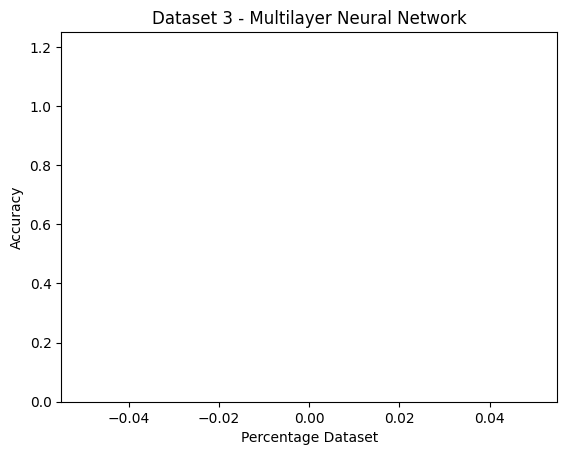

In [200]:
acc=[]
i=0.2
while(i<=0.2):
    print("dataset size = ",i*100,'%')
    acc.append((i,MNN(i)))
    i=i+0.2
print(acc) 
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()
#model.summary()

In [210]:
for i in range(489):
    print(val_ds[i])

[ 3  6 13]
[ 3  5 13]
[3 6 9]
[ 2  4 10]
[1 3 9]
[ 5  7 11]
[2 7 9]
[ 5  6 13]
[ 1  4 11]
[ 2  3 12]
[ 1  7 12]
[ 1  2 13]
[3 8 9]
[ 2  6 12]
[ 1  6 10]
[ 3  4 11]
[ 1  5 10]
[1 2 9]
[ 1  7 11]
[3 7 9]
[4 5 9]
[2 3 9]
[ 6  8 10]
[ 4  6 13]
[ 1  3 11]
[ 2  8 13]
[1 4 9]
[ 4  7 12]
[ 3  4 10]
[ 4  5 10]
[ 2  3 12]
[4 7 9]
[ 5  6 13]
[ 2  8 11]
[ 2  8 11]
[2 5 9]
[ 1  5 13]
[ 4  7 13]
[ 4  8 13]
[ 2  7 13]
[ 1  8 12]
[2 4 9]
[1 4 9]
[ 5  6 12]
[ 2  4 11]
[ 5  8 12]
[ 2  5 13]
[ 1  6 10]
[ 1  8 11]
[ 3  6 10]
[5 7 9]
[ 6  8 13]
[ 4  7 11]
[ 1  4 11]
[ 3  5 13]
[7 8 9]
[ 3  5 13]
[ 3  7 12]
[1 7 9]
[3 5 9]
[ 3  6 13]
[ 5  7 11]
[ 2  5 12]
[1 7 9]
[ 3  7 13]
[ 2  7 12]
[ 2  7 10]
[ 3  8 13]
[ 1  6 10]
[ 3  5 11]
[ 6  7 12]
[4 8 9]
[ 4  6 12]
[ 3  4 13]
[ 4  6 13]
[ 1  8 11]
[ 7  8 11]
[1 6 9]
[ 4  8 11]
[ 5  6 11]
[ 5  7 11]
[ 1  5 11]
[1 2 9]
[ 6  8 11]
[ 2  3 11]
[ 1  6 12]
[ 1  8 12]
[ 2  4 12]
[ 6  8 10]
[ 6  8 13]
[ 2  7 10]
[1 8 9]
[ 3  7 13]
[ 1  3 10]
[ 1  3 11]
[ 1  7 13]
[5 6 9]
[ 

In [142]:
def emoji_val(i,c,val):
    #print(i,c,val)
    for k in range(214):
        if(emoticon_X[i][c] == em_en[k][0]):
            #print(emoticon_X[i][c],'avav\t',em_en[k][0])
            em_en[k][1]=val
            break

In [143]:
def chk(i,j):
    #print(known)
    trn=0
    while(trn<7):
        #print(emoticon_X[i][j],"cv",known[trn][0])
        if(emoticon_X[i][j]==known[trn][0]):
            return trn
        trn=trn+1
    return -1

In [246]:
import re

# result = count.items()
# data = list(result)
# em_en=np.array(data)
emoticon_X = [list(datapoint) for datapoint in train_emoticon_X]
em_en=np.asarray([sublist for sublist in count])
known[0][1]=262
known[1][1]=614
known[2][1]=1596
known[3][1]=464
known[4][1]=422
known[5][1]=284
known[6][1]=15436
#print(known)
em_en[0][1]=262
em_en[1][1]=614
em_en[2][1]=1596
em_en[3][1]=464
em_en[4][1]=422
em_en[5][1]=284
em_en[6][1]=15436
# print(em_en[0][0]==emoticon_X[0][6])
# print(len(emoticon_X))
# print(em_en[0:10])

        

t_X=[int(train_seq_X[i]) for i in range(7080)]
tr_X=[str(t_X[i]) for i in range(7080)]
#print(tr_X[0])
     
cnt=7
for i in range(4500,7080):
    l=0
    if i in [198,385,331] :continue
    for j in range(13):
        id=chk(i,j)
        if(id!=-1):
            #print(tr_X[i])
            
            tr_X[i]=tr_X[i].replace(str(known[id][1]),'a',1)
            l=l+len(str(known[id][1]))
#print(tr_X[0:10]) 
i=0
for i in range(7080):    
    c=0
    k=0
    if i in [198,385,331] :continue
    #b= [int(x) for x in (tr_X[i]).split() if x.isnumeric()]
    b=list(map(int, re.findall(r'\d+', tr_X[i])))
    if len(b)!=3:
        continue
    
    #print(len(tr_X[i]))
    
    while k<len(tr_X[i]):
        if tr_X[i][k]=='a':
            c=c+1
            k=k+1
        else:
            #print(tr_X[i][k:])
            #a=(re.findall(r'\d+', tr_X[i][k:]))
            a=list(map(int, re.findall(r'\d+', tr_X[i][k:])))
            #a= [int(x) for x in (tr_X[i][k:]).split() if x.isnumeric()]
            #print(a[0],len(str(a)))
            if not a[0] in known:
                known.append(a[0])
            if len(known)==214:
                break
            #print(i,c,a[0],k,len(str(a[0])))    
            emoji_val(i,c,a[0])   
            #print())
            k=k+len(str(a[0]))
            c=c+1
            
    if len(known)==214:
        break
    
        
print(em_en)
    
    


[['🙯' '262']
 ['😣' '3']
 ['😑' '3896']
 ['🛐' '46283']
 ['🚼' '1410']
 ['🙼' '284']
 ['😛' '0']
 ['🛆' '3510']
 ['🛌' '5066']
 ['🙮' '4869']
 ['😶' '5774']
 ['😩' '2670']
 ['🛇' '2999']
 ['🚽' '1959']
 ['🚠' '2414']
 ['🚇' '2857']
 ['😡' '1120']
 ['🛏' '3023']
 ['🛀' '940']
 ['🚾' '4521']
 ['🙨' '3324']
 ['😢' '3682']
 ['😒' '166']
 ['🛟' '2548']
 ['🚯' '1415']
 ['🚣' '2931']
 ['🚝' '2920']
 ['🚜' '2919']
 ['🙬' '1795']
 ['🙛' '2791']
 ['😥' '1129']
 ['\U0001f6d9' '486']
 ['🛑' '4051']
 ['🛂' '2481']
 ['🚁' '1314']
 ['🙽' '1821']
 ['🙫' '2816']
 ['🙒' '4309']
 ['🙏' '4310']
 ['😻' '2718']
 ['😬' '5237']
 ['😪' '3695']
 ['😔' '2623']
 ['😍' '2091']
 ['😉' '3104']
 ['🛍' '1485']
 ['🚿' '4524']
 ['🚡' '5999']
 ['🚏' '6469']
 ['🚃' '1828']
 ['🙸' '2327']
 ['🙩' '4349']
 ['🙊' '4304']
 ['😊' '2598']
 ['😇' '2078']
 ['😁' '6659']
 ['🛄' '2996']
 ['🚷' '1433']
 ['🚰' '3980']
 ['🚦' '2425']
 ['🙢' '1270']
 ['🙄' '1731']
 ['😿' '4790']
 ['😴' '3720']
 ['😮' '2682']
 ['😕' '2624']
 ['🙕' '2780']
 ['🙎' '5333']
 ['😹' '4761']
 ['😱' '1157']
 ['😦' '2154']
 ['😓' '

In [208]:
print(type(tr_X))

<class 'list'>


In [ ]:
for m in range(

In [278]:
#emoticon_X = [list(datapoint) for datapoint in train_emoticon_X]
#print(emoticon_X)

[['😛', '🛐', '😻', '😑', '😣', '🙠', '🙯', '🚼', '😒', '🙼', '😑', '🙯', '😣'], ['🛐', '😑', '😪', '😛', '🚼', '🙯', '😣', '🚅', '😑', '🙯', '😹', '😣', '🙼'], ['😛', '🙯', '😑', '🚡', '😣', '🚼', '🛐', '🙲', '😣', '🙯', '🛑', '😑', '🙼'], ['😛', '🚼', '🛐', '🙐', '😣', '🙯', '😑', '🙪', '😑', '🙼', '🛆', '😣', '🙯'], ['🛐', '🚟', '🚼', '😛', '🙋', '😑', '😣', '🙯', '😹', '🙯', '😑', '😣', '🙼'], ['😑', '😣', '🚧', '😛', '🚜', '🚼', '🙯', '🛐', '🙼', '😣', '😑', '🙕', '🙯'], ['😣', '😑', '🙯', '🚼', '🛐', '🚥', '😬', '😛', '😣', '🚄', '😑', '🙼', '🙯'], ['🚡', '🚼', '😑', '🛐', '🚔', '🙯', '😛', '😣', '😑', '🙯', '🛓', '🙼', '😣'], ['🛐', '😛', '🛜', '😑', '🚼', '😚', '😣', '🙯', '😣', '😑', '🙯', '🚠', '🙼'], ['🙯', '😑', '🙷', '🛐', '🚼', '😣', '😛', '😍', '😿', '🙯', '🙼', '😑', '😣'], ['😣', '🙯', '🛐', '😑', '😛', '🚼', '🙚', '😍', '🙯', '🙼', '😣', '😑', '😸'], ['😛', '😯', '🚼', '🙯', '😑', '🛐', '😻', '😣', '🙼', '🙯', '😹', '😑', '😣'], ['😑', '🙯', '😛', '🛐', '🚼', '🙒', '🚙', '😣', '🙯', '😣', '😑', '🙼', '😬'], ['😿', '😣', '🚼', '🚴', '😛', '😑', '🙯', '🛐', '😣', '🙯', '😑', '😴', '🙼'], ['😛', '🛐', '🚼', '🚂', '🙯', '😦', '😣', '😑', '🙯', '😑', '😣', '🙼', 

In [30]:
print(train_emoticon_X[198],'\t', train_emoticon_Y[198],'\t', train_seq_X[198])




🛐😕😣🙯😑🚼😛🙗😣🙯😑🙼🙽 	 1 	 00046426246142621596422154361250661426215962841821


In [210]:
import re
import numpy as np
print("Try programiz.pro")

p=([['abcb']])
print(p[0][1:])
p[i]=p[0][0:1] + p[0][1:].replace('b','a',1)
print(p)

Try programiz.pro
[]


AttributeError: 'list' object has no attribute 'replace'

# single hidden layer neural network

In [147]:
import random
import math

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases for input -> hidden
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
        
        # Initialize weights and biases for hidden -> output
        self.weights_hidden_output = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(hidden_size)]
        self.bias_output = [random.uniform(-1, 1) for _ in range(output_size)]
    
  
    def feedforward(self, inputs):
        # Hidden layer activations
        hidden_layer_output = []
        for j in range(self.hidden_size):
            activation = sum([inputs[i] * self.weights_input_hidden[i][j] for i in range(self.input_size)]) + self.bias_hidden[j]
            hidden_layer_output.append(sigmoid(activation))
        
        # Output layer activations
        output_layer_output = []
        for k in range(self.output_size):
            activation = sum([hidden_layer_output[j] * self.weights_hidden_output[j][k] for j in range(self.hidden_size)]) + self.bias_output[k]
            output_layer_output.append(sigmoid(activation))
        
        return output_layer_output, hidden_layer_output
    
    
    def backpropagate(self, inputs, expected_output, outputs, hidden_output, learning_rate):
        # Calculate output layer error
        output_errors = [expected_output[i] - outputs[i] for i in range(self.output_size)]
        output_deltas = [output_errors[i] * sigmoid_derivative(outputs[i]) for i in range(self.output_size)]
        
        # Calculate hidden layer error
        hidden_errors = [0] * self.hidden_size
        hidden_deltas = [0] * self.hidden_size
        for j in range(self.hidden_size):
            hidden_errors[j] = sum([output_deltas[k] * self.weights_hidden_output[j][k] for k in range(self.output_size)])
            hidden_deltas[j] = hidden_errors[j] * sigmoid_derivative(hidden_output[j])
        
        # Update weights and biases from hidden to output
        for j in range(self.hidden_size):
            for k in range(self.output_size):
                self.weights_hidden_output[j][k] += hidden_output[j] * output_deltas[k] * learning_rate
        for k in range(self.output_size):
            self.bias_output[k] += output_deltas[k] * learning_rate
        
        # Update weights and biases from input to hidden
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                self.weights_input_hidden[i][j] += inputs[i] * hidden_deltas[j] * learning_rate
        for j in range(self.hidden_size):
            self.bias_hidden[j] += hidden_deltas[j] * learning_rate
    
    # Train the neural network
    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for inputs, expected_output in training_data:
                outputs, hidden_output = self.feedforward(inputs)
                self.backpropagate(inputs, [expected_output] * self.output_size, outputs, hidden_output, learning_rate)
    
    
    def predict(self, inputs):
        outputs, _ = self.feedforward(inputs)
        return [1 if out > 0.5 else 0 for out in outputs]

# Main function to take user input, train, and verify the neural network
def NN():
    # Take the boolean function as input from the user
    #boolean_function_str = input("Enter a Boolean function with variables x1, x2, x3: ")
    train_seq_X2=[]
    # Generate training data for the Boolean function
    #training_data = [(tuple(list(train_seq_X[i])),train_seq_Y[i]) for i in range(7080)]
    training_data=train_seq_X2
    print(training_data[0])
    # Initialize neural network parameters
    input_size = 50  # 3 input neurons for x1, x2, x3
    hidden_size = 80  # User-defined hidden layer size
    output_size = 1  # 1 output neurons

    # Create and train the neural network
    nn = NeuralNetwork(input_size, hidden_size, output_size)
    
    # Train the network with training data
    nn.train(training_data, epochs=100, learning_rate=0.1)
    
    # Print training results
    print("\nTraining Results:")
    correct_predictions = 0
    total_predictions = 7080
    val_seq_X2=[]
    for i in range(7080):
        pup=[]
        for j in range(50):
            t=int(val_seq_X[i][j])
            pup.append(t)
        pup=tuple(pup)
        val_seq_X2.append((pup,val_seq_Y[i])) 
    
    for inputs, expected_output in val_seq_X2:
        prediction = nn.predict(inputs)
        if prediction[0] == expected_output:
            correct_predictions += 1
        
    accuracy = correct_predictions / total_predictions
    return accuracy
    #for inputs, expected_output in training_data:
    #    prediction = nn.predict(inputs)
        #print(f"Inputs: {inputs} -> Expected: {expected_output}, Predicted: {prediction}")
NN()


IndexError: list index out of range

In [55]:
'''def verify_neural_network(nn):
    test_data = generate_training_examples(boolean_function_str)
    correct_predictions = 0
    total_predictions = len(test_data)
    
    for inputs, expected_output in test_data:
        prediction = nn.predict(inputs)
        if prediction[0] == expected_output:
            correct_predictions += 1
    
    accuracy = correct_predictions / total_predictions
    return accuracy'''

'def verify_neural_network(nn):\n    test_data = generate_training_examples(boolean_function_str)\n    correct_predictions = 0\n    total_predictions = len(test_data)\n    \n    for inputs, expected_output in test_data:\n        prediction = nn.predict(inputs)\n        if prediction[0] == expected_output:\n            correct_predictions += 1\n    \n    accuracy = correct_predictions / total_predictions\n    return accuracy'

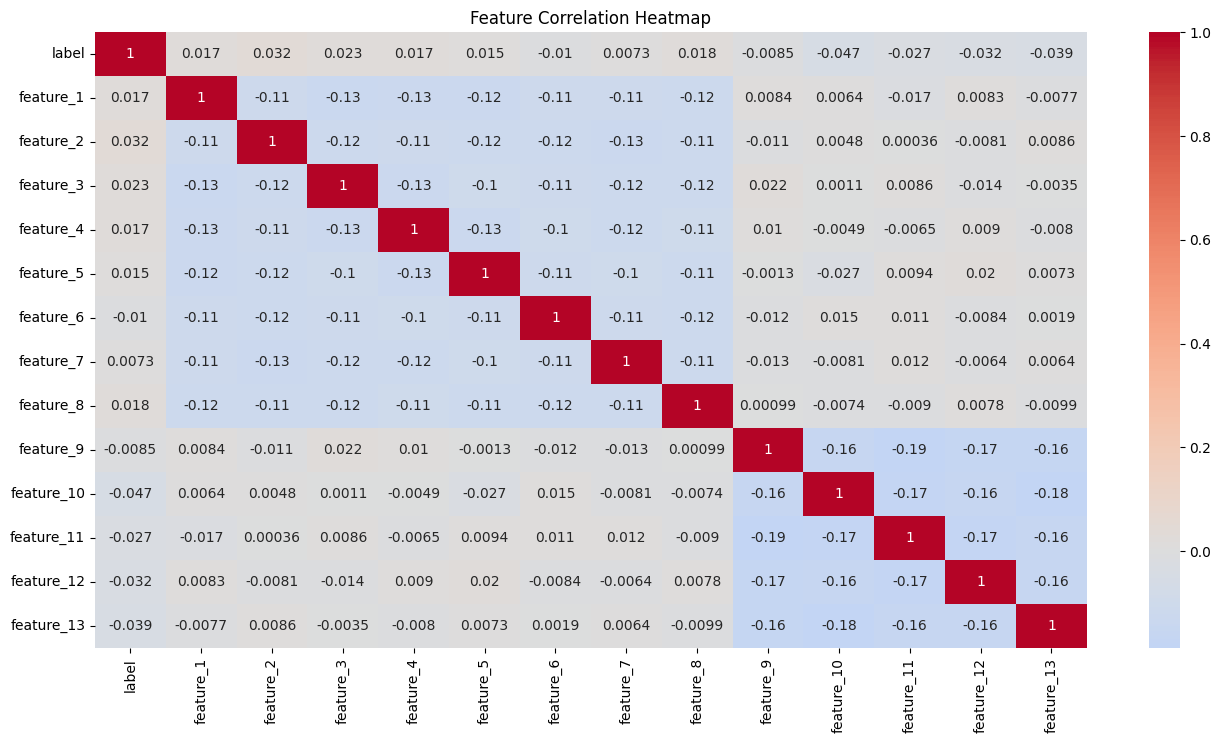

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Sample dataset (replace this with your actual dataset)
# data = {
#     'input': ['😀😃😄😁😆😅😂🤣😊😇🙂🙃😉', '😂😅😀😃😄😁😆🤣😊😇🙂🙃😉'],  # example emoji strings
#     'output': [0, 1]  # corresponding labels
# }

# Convert the dataset to a DataFrame
df = pd.read_csv("datasets/train/train_emoticon.csv")

# Function to convert emoji to its Unicode hex value as an integer
def emoji_to_unicode_int(emoji):
    return ord(emoji)

# Split the emoji strings into 13 separate features (columns)
for i in range(13):
    df[f'feature_{i+1}'] = df["input_emoticon"].apply(lambda x: emoji_to_unicode_int(x[i]))

# Drop the original input column
df.drop("input_emoticon", axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


# multilayer NN

In [64]:
def MNN(percent):
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras import layers, models
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    # Define the neural network
    model = models.Sequential()
    
    # Input layer
    model.add(layers.InputLayer(input_shape=(50,)))
    
    # Hidden layer 1 with 100 nodes
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    model.add(layers.Dense(13, activation='relu'))
    '''
    # Hidden layer 2 with 40 nodes
    model.add(layers.Dense(40, activation='relu'))'''
    
    # Output layer with 1 node (for binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    dataset=int(percent*7080)
    # # Generate random dataset
    # np.random.seed(42)  # For reproducibility
    # X = np.random.rand(1000, 50)  # 1000 samples, 50 features
    # y = np.random.randint(0, 2, 1000)  # Binary target (0 or 1)
    #print(type(train_seq_X[0]))
    # Split dataset into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #X_train=np.array([1,2,3])
    #y_train=np.array([1])
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    # Train the model
    model.fit(X_train, y_train, epochs=110, batch_size=32, verbose=0, validation_data=(X_test,y_test), validation_freq=1)
    
    # Predict on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Test Accuracy: {accuracy * 100:.2f}%")
    #if percent == 0.2:
    model.summary
    return accuracy


In [62]:
acc=[]
i=0.2
while(i<=0.2):
    print("dataset size = ",i*100,'%')
    acc.append((i,MNN(i)))
    i=i+0.2
print(acc)    


dataset size =  20.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
<bound method Model.summary of <Sequential name=sequential_18, built=True>>
[(0.2, 0.5276073619631901)]


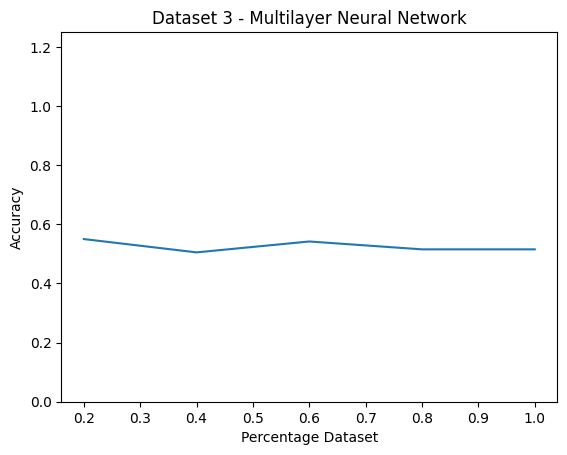

In [53]:
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 - Multilayer Neural Network')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

In [285]:
print(type(train_seq_X[0]))
X_train=[int(ele) for ele in train_seq_X[i].split() for i in range(7080)]
print(X_train[0:10])
print(train_seq_X[0:4])

<class 'str'>
[46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596, 46461457742621543615964223512128426243046141596]
['00001543646427181596614280026242231322841596262614', '00046415963695154364222626141104715962624761614284', '00015436262159659996144224641358061426240511596284', '00001543642246412386142621596895615962843510614262']


In [13]:
X = np.random.randint(0, 100, size=(1000, 50))
print(X)

[[64 48 84 ... 77  2 80]
 [55  9 32 ... 92 21 46]
 [ 8 49 15 ...  1 37 86]
 ...
 [80 56 11 ... 47 87 73]
 [49 77 14 ... 13 77 82]
 [92 75 56 ... 99 10 78]]


In [131]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the neural network
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(50,)))

# Hidden layer 1 with 100 nodes
model.add(layers.Dense(100, activation='relu'))

# Hidden layer 2 with 40 nodes
model.add(layers.Dense(40, activation='relu'))

# Output layer with 1 node (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)                    │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 40)                  │           4,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,181 (35.86 KB)

 Trainable params: 9,181 (35.86 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
def KNN(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.feature_extraction import FeatureHasher
    
    # Generate random dataset with integer values (same as before)
    dataset=int(percent*7080)
    # Generate random dataset with integer values (same as before)
    X_train1= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    X_str = X_train1.astype(str)

    # Use FeatureHasher for hashing transformation
    hasher = FeatureHasher(n_features=50, input_type='string')  # 128 hashed features
    X_train = hasher.transform(X_str).toarray()
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    # Initialize the KNN classifier with k=5 (you can change the number of neighbors)
    knn = KNeighborsClassifier(n_neighbors=10)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"KNN Test Accuracy: {accuracy * 100:.2f}%")
    return accuracy
acc=[]
i=0.2
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,KNN(i)))
    i=i+0.2
print(acc)    


dataset size =  20.0 %
dataset size =  40.0 %
dataset size =  60.00000000000001 %
dataset size =  80.0 %
dataset size =  100.0 %
[(0.2, 0.523517382413088), (0.4, 0.49284253578732107), (0.6000000000000001, 0.4867075664621677), (0.8, 0.4867075664621677), (1.0, 0.5051124744376279)]


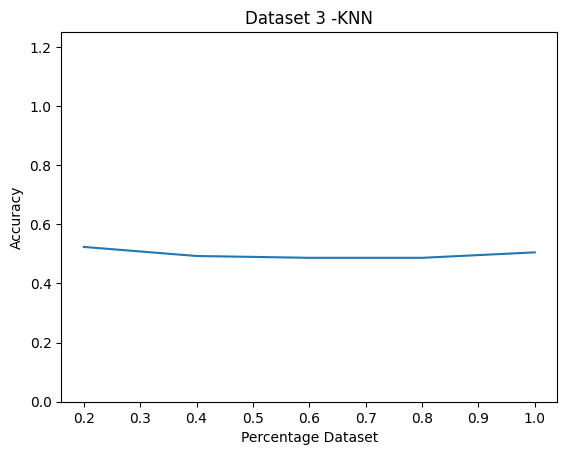

In [19]:
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 -KNN')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

In [25]:
def LR(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    from sklearn.feature_extraction import FeatureHasher
    
    # Generate random dataset with integer values (same as before)
    dataset=int(percent*7080)
    # Generate random dataset with integer values (same as before)
    X_train1= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    X_str = X_train1.astype(str)

    # Use FeatureHasher for hashing transformation
    hasher = FeatureHasher(n_features=128, input_type='string')  # 128 hashed features
    X_train = hasher.transform(X_str).toarray()
    y_train=np.array(train_seq_Y[:dataset])
    X_test1=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    X_str1 = X_test1.astype(str)

    # Use FeatureHasher for hashing transformation
    hasher = FeatureHasher(n_features=128, input_type='string')  # 128 hashed features
    X_test = hasher.transform(X_str1).toarray()
    y_test=np.array(val_seq_Y)
    
    # Initialize the Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000)  # max_iter increased for convergence
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = log_reg.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
acc=[]
i=0.2
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,LR(i)))
    i=i+0.2
print(acc)


dataset size =  20.0 %
dataset size =  40.0 %
dataset size =  60.00000000000001 %
dataset size =  80.0 %
dataset size =  100.0 %
[(0.2, 0.48261758691206547), (0.4, 0.4785276073619632), (0.6000000000000001, 0.5010224948875256), (0.8, 0.48057259713701433), (1.0, 0.4867075664621677)]


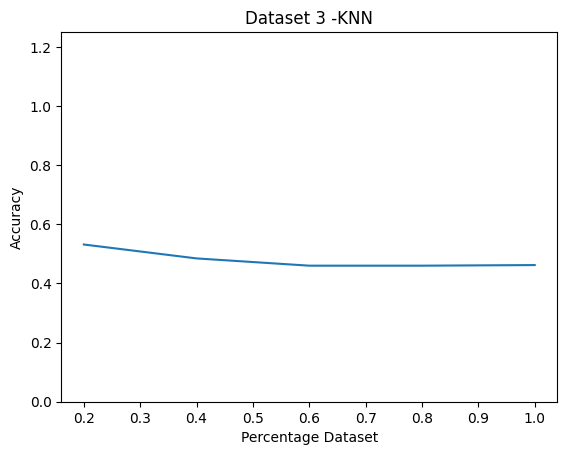

In [13]:
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 -KNN')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

dataset size =  20.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
dataset size =  40.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
dataset size =  60.00000000000001 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
dataset size =  80.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
dataset size =  100.0 %


C:\Users\puspe\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[(0.2, 0.558282208588957), (0.4, 0.5337423312883436), (0.6000000000000001, 0.5828220858895705), (0.8, 0.5316973415132924), (1.0, 0.5337423312883436)]


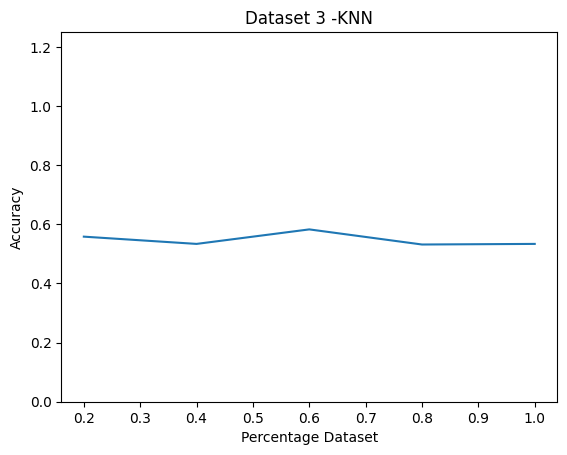

In [171]:
def LwP(percent):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from scipy.spatial.distance import cdist
    # Generate random dataset with integer values (same as before)
    dataset=int(percent*7080)
    # Generate random dataset with integer values (same as before)
    X_train= np.array([list(map(int,train_seq_X[i])) for i in range(dataset)])
    #print(type(X_train[0][0]))
    #print(X_train[0:5])
    y_train=np.array(train_seq_Y[:dataset])
    X_test=np.array([list(map(int,val_seq_X[i])) for i in range(489)])
    y_test=np.array(val_seq_Y)
    
    prototype_class_0 = np.mean(X_train[y_train == 0], axis=0)  # Mean prototype for class 0
    prototype_class_1 = np.mean(X_train[y_train == 1], axis=0)  # Mean prototype for class 1
    
    # Step 2: Define the prototypes
    prototypes = np.array([prototype_class_0, prototype_class_1])
    prototype_labels = np.array([0, 1])  # Class labels for the prototypes
    
    # Step 3: Predicting based on distance to prototypes
    def predict_with_prototypes(X_test, prototypes, prototype_labels):
        # Compute distances between each test point and each prototype
        distances = cdist(X_test, prototypes, metric='euclidean')
        
        # Find the closest prototype for each test point
        closest_prototype_indices = np.argmin(distances, axis=1)
        
        # Return the corresponding class labels of the closest prototypes
        return prototype_labels[closest_prototype_indices]
    
    # Predict on the test set
    y_pred = predict_with_prototypes(X_test, prototypes, prototype_labels)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy
acc=[]
i=0.2
while(i<=1):
    print("dataset size = ",i*100,'%')
    acc.append((i,MNN(i)))
    i=i+0.2
print(acc)
import matplotlib.pyplot as plt
plt.plot(*zip(*acc))
plt.ylim(0, 1.25)
plt.title('Dataset 3 -KNN')
plt.xlabel('Percentage Dataset')
plt.ylabel('Accuracy')
plt.show()

In [57]:
print(len((train_feat_X[0])))
print(train_emoticon_X[0:8
      ])

13
['😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣', '🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼', '😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼', '😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯', '🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼', '😑😣🚧😛🚜🚼🙯🛐🙼😣😑🙕🙯', '😣😑🙯🚼🛐🚥😬😛😣🚄😑🙼🙯', '🚡🚼😑🛐🚔🙯😛😣😑🙯🛓🙼😣']
